# **Personalized Health Insurance Pricing**

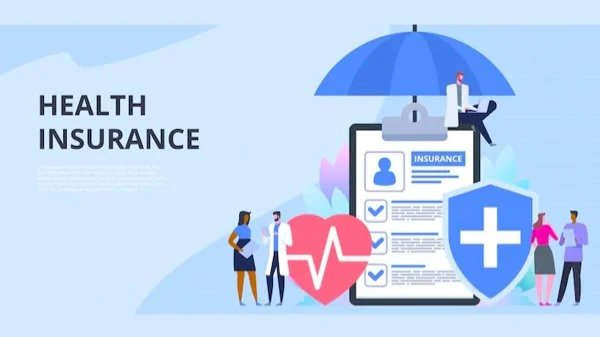

* The primary objective of the project "Personalized Health Insurance Pricing" is to leverage machine learning techniques to predict medical insurance charges based on individual attributes, such as age, sex, bmi, children, smoker, region.

> The project aims to:
* Develop Predictive Models: Build robust machine learning models to accurately predict insurance charges for individuals.
* Understand Key Influencers: Identify and analyze the most significant factors influencing insurance costs, such as age, BMI, smoking habits, and region.
* Enhance Personalization: Enable personalized pricing strategies for health insurance policies by tailoring premiums to individual risk profiles.
* Drive Transparency: Provide actionable insights into how specific features contribute to insurance charges, enhancing customer understanding and trust.
* Optimize Business Decisions: Support insurance companies in making data-driven decisions regarding premium pricing and customer segmentation.
* Promote Fairness: Ensure that pricing strategies are equitable and free from bias based on sensitive factors.

> Dataset Overview
* Age : The age of the individual.
    * Age may have a direct relationship with insurance charges, as older individuals might have higher medical expenses.
    * Useful for segmentation, such as comparing charges for different age groups (e.g., children, young adults, middle-aged, seniors).
* Sex : Gender of the individual (0 = Female) (1 = Male)
    * Gender might influence insurance charges due to differing health risks between men and women.
    * Analyze if there’s a bias in pricing based on gender.
* bmi (Body Mass Index) :  A measure of body fat based on height and weight (BMI = weight (kg) / height² (m²))
    * High BMI (especially obese individuals) may correlate with increased medical costs and insurance charges.
* children : Number of dependents covered by the insurance policy.
    * More children might indicate higher insurance charges due to family coverage.
* smoker : Indicates whether the individual is a smoker (0 = Non-smoker) (1 = Smoker)
    * Smoking is likely to have a significant impact on charges, with smokers incurring much higher costs.
* region : The geographical region of the individual. Common categories might include(northwest, northeast, southeast, southwest)
    * Regional variations in medical costs and insurance rates due to differences in healthcare access, policies, or demographics.
* charges : The medical insurance cost for the individual.
    * The target variable for prediction.

# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, r2_score, mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from scipy.stats import chi2_contingency

import joblib as jb
import pickle as pk1

import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [2]:
df = pd.read_csv(r"E:\data science\Dataset\DATASET BY PAVAN SIR\medical insurance\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


> Insights from the Dataset Summary:
1. Age:
    * Mean: 39.2 years, indicating the average age is middle adulthood.
    * Range: 18 to 64 years, covering the typical working and insured age group.
    * Distribution: Spread is broad with a standard deviation of 14.05 years.
2. BMI (Body Mass Index):
    * Mean: 30.66, suggesting the average BMI is slightly above the healthy range (overweight category).
    * Range: 15.96 to 53.13, indicating some outliers (extremely low or high BMI values).
    * Distribution: Moderate variability with a standard deviation of 6.1.
3. Children:
    * Mean: 1.09, indicating most individuals have about one child on average.
    * Range: 0 to 5 children, with no extreme outliers.
    * Median (50th percentile): 1 child.
4. Charges (Insurance Premium):
    * Mean: $13,270.42, showing the average medical charges incurred.
    * Range: 1,121.87 to 63,770.43, with a large spread suggesting outliers (possibly smokers or individuals with higher BMI).
    * Median: $9,382.03, indicating a slightly right-skewed distribution where a few individuals have significantly higher charges.
5. Quartiles:
    * Age: 50% of individuals are between 27 and 51 years old.
    * BMI: 50% of individuals have a BMI between 26.30 and 34.69, within the overweight or obese categories.
    * Children: 75% of the population has 2 or fewer children.
    * Charges: 50% of charges are between 4,740.29 and 16,639.91, with the remaining 50% skewed towards higher charges.

# Checking Null Values

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There is no null values

In [6]:
# Checking duplicate values in dataset
df.duplicated().sum()

np.int64(1)

In [7]:
# Dropping duplicate values
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

# Age Vs Charges

In [9]:
df["age"].min(), df["age"].max()

(np.int64(18), np.int64(64))

In [10]:
# making age ranges for better viauslization\
df["Age_Range"] = pd.cut(df["age"], bins=[18,25,35,45,55,64], 
                         retbins=True, labels=["Young Adults (18-25)","Early Career (26-35)","Mid Career (36-45)",
                                              "Late Career (46-55)","Pre Retirement (56-64)"])[0]

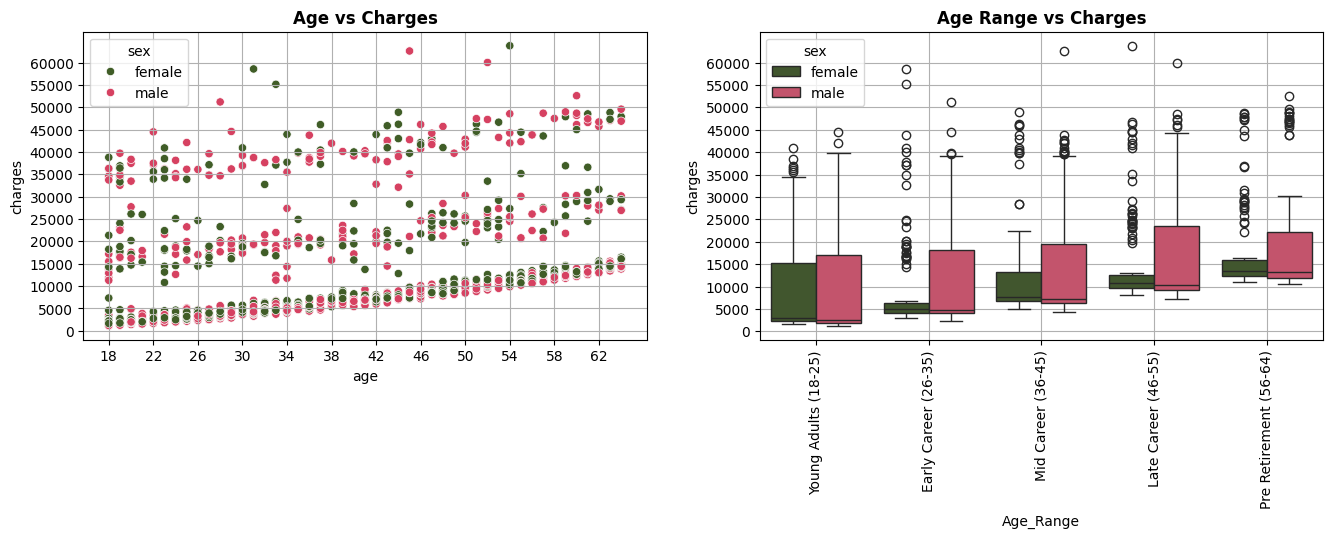

In [11]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.scatterplot(df, x="age", y="charges", hue="sex", palette=["#405d27","#d64161"])
plt.xticks(range(18,66,4))
plt.yticks(range(0,65000,5000))
plt.title("Age vs Charges", fontsize=12, fontweight="bold")
plt.grid()
plt.subplot(1,2,2)
sns.boxplot(df, x="Age_Range", y="charges", hue="sex",dodge=True, palette=["#405d27","#d64161"])
plt.title("Age Range vs Charges", fontsize=12, fontweight="bold")
plt.xticks(rotation=90)
plt.yticks(range(0,65000,5000))
plt.grid()
plt.show()

> Findings
* Young Adults (18–25):
    * Low representation in the higher charge ranges.
    * Suggests that young adults generally incur lower insurance charges due to fewer health risks and possibly lower coverage levels.
* Early Career (26–35):
    * This group has some presence in the higher charge ranges (e.g., 51194.55914 and 55135.40209).
    * It may indicate that insurance charges for this group increase with age and responsibilities, such as family coverage or higher risk behaviors.
* Mid Career (36–45):
    * A notable representation in mid-to-high insurance charges (e.g., 48885.13561 and 62592.87309).
    * Likely reflects increased health risks and higher coverage needs during this life stage.
* Late Career (46–55):
    * Limited presence in the lower charge ranges but significant representation in high charges (e.g., 60021.39897 and 63770.42801).
    * Insurance premiums likely increase due to rising health concerns and the need for comprehensive health coverage.
* Pre-Retirement (56–64):
    * Concentrated in the highest charge ranges (e.g., 49577.66240, 52590.82939).
    * Reflects the highest health risks and coverage requirements before retirement.

* Charges Increase with Age:
    * Young adults incur the lowest charges, while pre-retirement individuals have the highest.
    * This aligns with insurance companies' policies, where age-related health risks significantly impact premiums.
* Low Charges are Common in Younger Age Groups:
    * Nearly all lower charges are associated with the Young Adults (18–25) group.
    * Indicates that this group benefits from lower baseline premiums.
* High Charges are Exclusive to Older Age Groups:
    * High charges (e.g., above $50,000) are primarily associated with Pre-Retirement (56–64) and, to a lesser extent, Late Career (46–55).

# BMI vs Charges

In [12]:
# Creating BMI Ranges
df["bmi_range"] = pd.cut(df["bmi"], bins=[15.96, 18.49, 24.99, 29.99, 39.99, 53.13], retbins=True,
                        labels=['Underweight', 'Healthy Weight', 'Overweight', 'Obese', 'Severely Obese'])[0]

> Custom Intervals for Insurance Analysis
* 15.96–18.49: Underweight (Low risk for health issues but possible malnutrition-related risks)
* 18.50–24.99: Healthy Weight (Lowest risk for most individuals)
* 25.00–29.99: Overweight (Moderate risk; premiums may start to increase)
* 30.00–39.99: Obese (High risk; likely higher insurance charges)
* 40.00–53.13: Severely Obese (Very high risk; highest premiums)

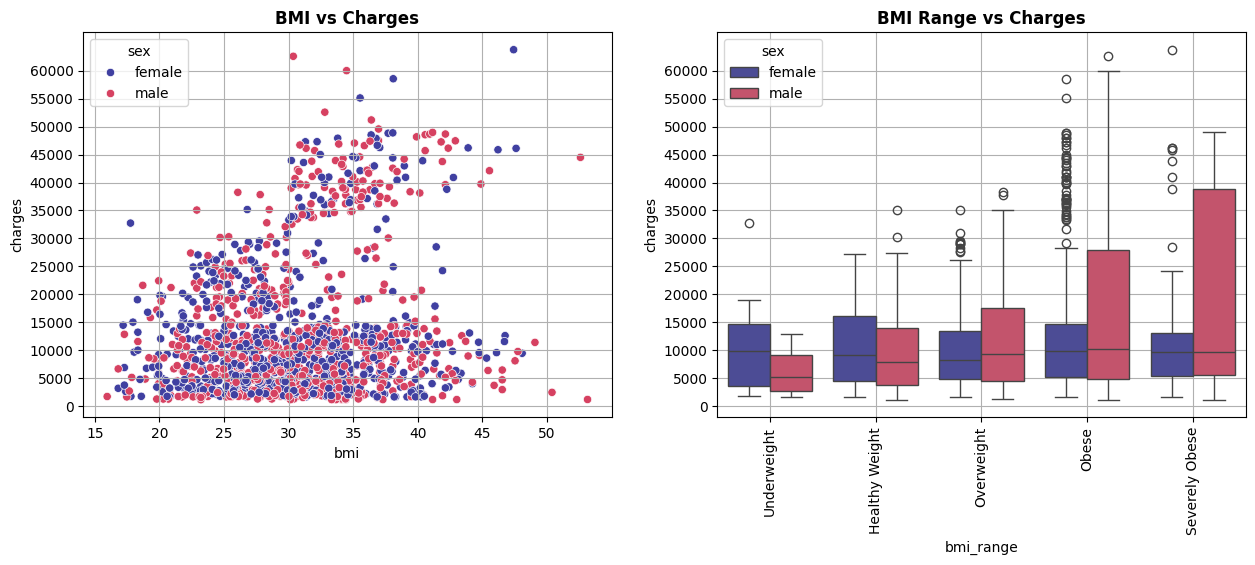

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(df, x="bmi", y="charges", hue="sex", palette=["#4040a1","#d64161"])
#plt.xticks(range(18,66,4))
plt.yticks(range(0,65000,5000))
plt.title("BMI vs Charges", fontsize=12, fontweight="bold")
plt.grid()
plt.subplot(1,2,2)
sns.boxplot(df, x="bmi_range", y="charges", hue="sex",dodge=True, palette=["#4040a1","#d64161"])
plt.title("BMI Range vs Charges", fontsize=12, fontweight="bold")
plt.xticks(rotation=90)
plt.yticks(range(0,65000,5000))
plt.grid()
plt.show()

> Findings
* Underweight:
    * No charges are associated with the Underweight category.
    * This group might have a negligible presence in the dataset or insurance charges for underweight individuals are relatively low and not captured here. Alternatively, underweight individuals may be less likely to have health issues requiring high insurance premiums.
* Healthy Weight:
    * Only the lowest insurance charge ($1121.87) falls into this range.
    * Individuals in the Healthy Weight range generally incur lower insurance charges due to minimal health risks. The lack of higher charges suggests fewer health-related complications among this group.
* Overweight:
    * No charges are explicitly marked for this range.
    * This might be due to a gap in data representation, or individuals in the Overweight category are transitioning towards higher-risk categories (e.g., Obese) as charges increase.
    * This could also indicate that health risks associated with overweight individuals may not significantly impact insurance charges unless they progress to obesity.
* Obese:
    * A large number of charges, including mid-range (1131.51 – 1163.46) and higher charges (e.g., 48885.14, 49577.66), are associated with this group.
    * Obese individuals contribute significantly to mid-to-high insurance charges.
    * Reflects the increased risk of chronic conditions such as diabetes, hypertension, and cardiovascular issues that drive up healthcare costs and insurance premiums.
* Severely Obese:
    * Higher insurance charges are strongly associated with this category, particularly in the ranges above 50,000 (e.g., 48970.25, 63770.43).
    * The Severely Obese group represents the highest risk category, leading to the highest insurance charges.
    * Severe obesity is linked to multiple health complications requiring frequent medical attention and specialized care.

# Children Vs Charges

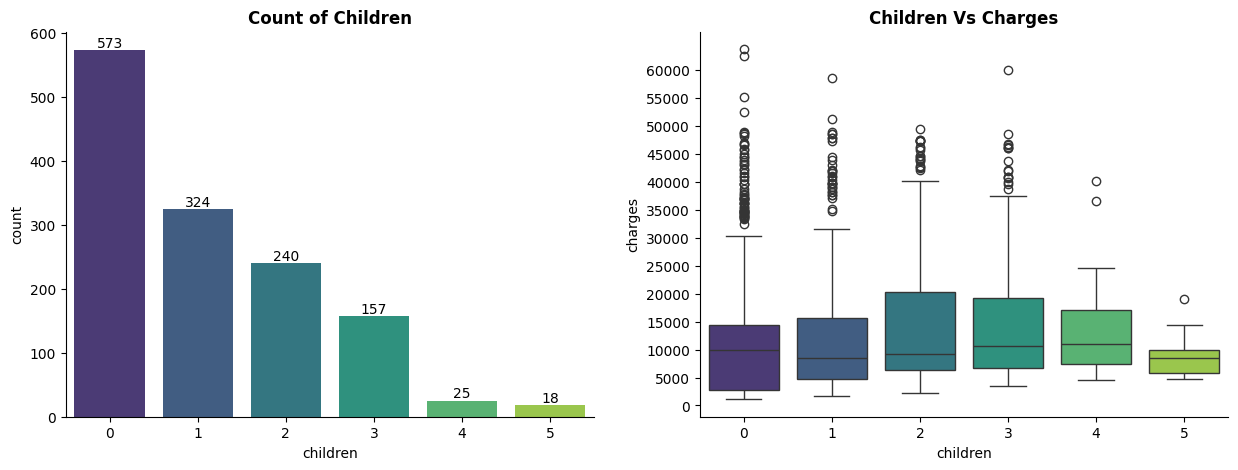

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(df, x="children", palette="viridis")
for bars in ax.containers:
    ax.bar_label(bars)
sns.despine(top=True, right=True)
plt.title("Count of Children", fontsize=12, fontweight="bold")
plt.subplot(1,2,2)
sns.boxplot(df, x="children", y="charges", palette="viridis")
plt.title("Children Vs Charges",fontsize=12, fontweight="bold")
sns.despine(top=True, right=True)
plt.yticks(range(0,65000,5000))
plt.show()

> Findings
* Majority (50.45%) of policyholders have no children.
* As the number of children increases, the number of policyholders decreases significantly.
* Families with No Children Dominate:
    * Over half of the policyholders have no children. This may reflect young, single individuals or couples without dependents who have lower health coverage needs.
* Policyholders with 1 or 2 Children are Common:
    * Combined, these groups account for almost 50% of the total population.
    * Families with 1 or 2 children are likely to have moderate coverage needs and make up a significant portion of the insured group.
* Policyholders with 3+ Children are Rare:
    * Families with 3 or more children make up less than 20% of the dataset.
    * Insurance charges for these families could be higher due to the larger coverage group.
* Low Representation of Large Families:
    * Families with 4 or 5 children constitute only 3.78% of the total.
    * This could reflect societal trends (e.g., smaller families) or economic factors where larger families might opt for alternative health coverage plans.

* Insurance Charges Increase with 1 to 3 Children:
    * Charges rise steadily from 12,384.70 (0 children) to 15,355.32 (3 children).
    * Families with more dependents may incur higher premiums due to the increased likelihood of medical expenses.
* Slight Drop at 4 Children:
    * Families with 4 children see a drop to 13,850.66 compared to those with 3 children ($15,355.32).
    * This could be due to family discounts or other policy factors that reduce per-child costs.
* Significant Decrease at 5 Children:
    * Families with 5 children have the lowest average charges (8,786.04).
    * This unexpected drop may indicate outliers, limited data for this group, or specific insurance policies tailored for large families.
* Single Dependents Are Slightly More Expensive:
    * The increase from 0 children (12,384.70) to 1 child (12,731.17) is marginal, suggesting that adding a single dependent does not drastically affect premiums.

# Gender Vs Charges

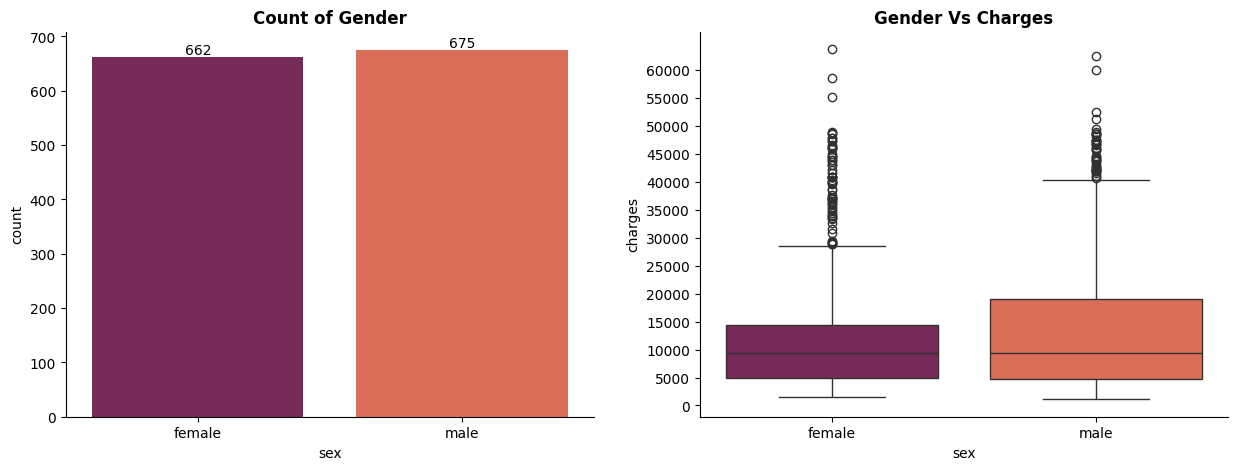

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(df, x="sex", palette="rocket")
for bars in ax.containers:
    ax.bar_label(bars)
sns.despine(top=True, right=True)
plt.title("Count of Gender", fontsize=12, fontweight="bold")
plt.subplot(1,2,2)
sns.boxplot(df, x="sex", y="charges", palette="rocket")
plt.title("Gender Vs Charges",fontsize=12, fontweight="bold")
sns.despine(top=True, right=True)
plt.yticks(range(0,65000,5000))
plt.show()

> Findings
* Balanced Distribution:
    * The dataset contains slightly more male policyholders (675) compared to females (662). The difference is relatively small, indicating a nearly balanced representation of both sexes.
* Minimal Gender Disparity:
    * The difference of 13 individuals is negligible and might not significantly affect any gender-specific trends or analyses in the dataset.
* Higher Insurance Charges for Males:
    * Male policyholders have higher average insurance charges (13,974.99) compared to female policyholders ($12,569.58).
    * This could reflect higher health risks, lifestyle factors, or insurance pricing models that account for gender differences in medical costs.
* Gender-Based Pricing:
    * The disparity in charges might be due to factors like higher mortality rates or healthcare usage patterns in men, often resulting in higher premiums. Alternatively, some insurance policies might adjust pricing based on gender.
* Potential Further Exploration:
    * You may want to investigate why the charges differ, possibly linking them to other features in the dataset (e.g., age, BMI, smoking status).

# Smoker Vs Charges

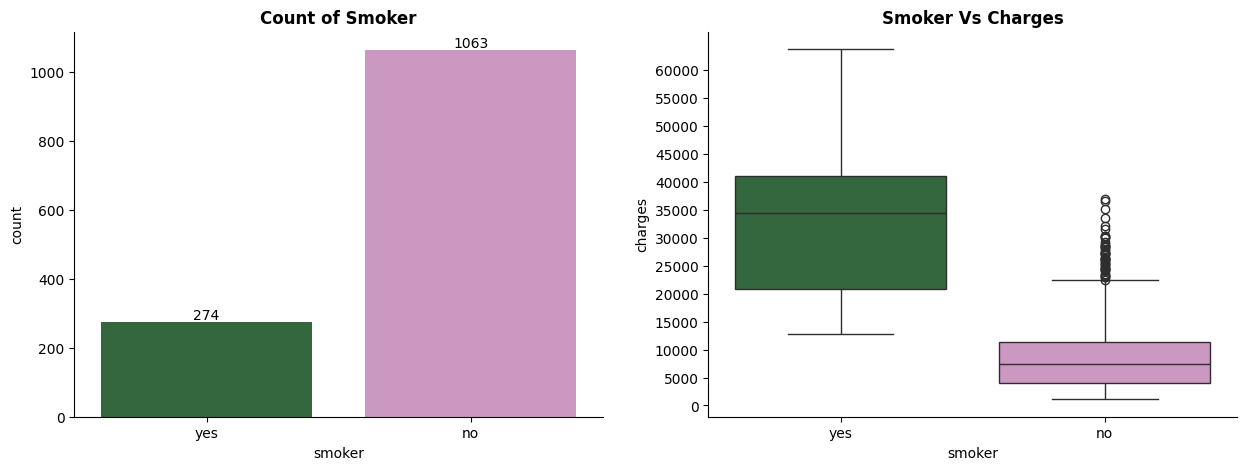

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(df, x="smoker", palette="cubehelix")
for bars in ax.containers:
    ax.bar_label(bars)
sns.despine(top=True, right=True)
plt.title("Count of Smoker", fontsize=12, fontweight="bold")
plt.subplot(1,2,2)
sns.boxplot(df, x="smoker", y="charges", palette="cubehelix")
plt.title("Smoker Vs Charges",fontsize=12, fontweight="bold")
sns.despine(top=True, right=True)
plt.yticks(range(0,65000,5000))
plt.show()

> Findings
* Majority of Policyholders are Non-Smokers:
    * 1,063 policyholders (about 79.4%) do not smoke, which is a significant majority.
* Smokers Represent a Minority:
    * Only 274 policyholders (about 20.6%) are smokers. This group is much smaller, but their insurance charges could differ due to health risks associated with smoking.
* Potential for Differentiated Charges:
    * Smokers often face higher insurance premiums due to the increased likelihood of health issues. You might want to explore how smoking status correlates with insurance charges in this dataset.
* Significant Difference in Charges:
    * Smokers have much higher average insurance charges (32,050.23) compared to non-smokers (8,440.66).
    * This large disparity suggests that smoking is associated with significantly higher health risks, leading to much higher premiums.
* Impact of Smoking on Insurance Costs:
    * Smokers are likely to face higher healthcare costs due to increased risks of various health conditions (e.g., heart disease, respiratory issues).
    * Insurance companies typically adjust premiums to account for these additional risks.
* Premium Adjustment for Health Risks:
    * The data reinforces the notion that smoking has a substantial effect on insurance premiums.
    * Smokers may be charged 4 times more than non-smokers on average.

# Region Vs Charges

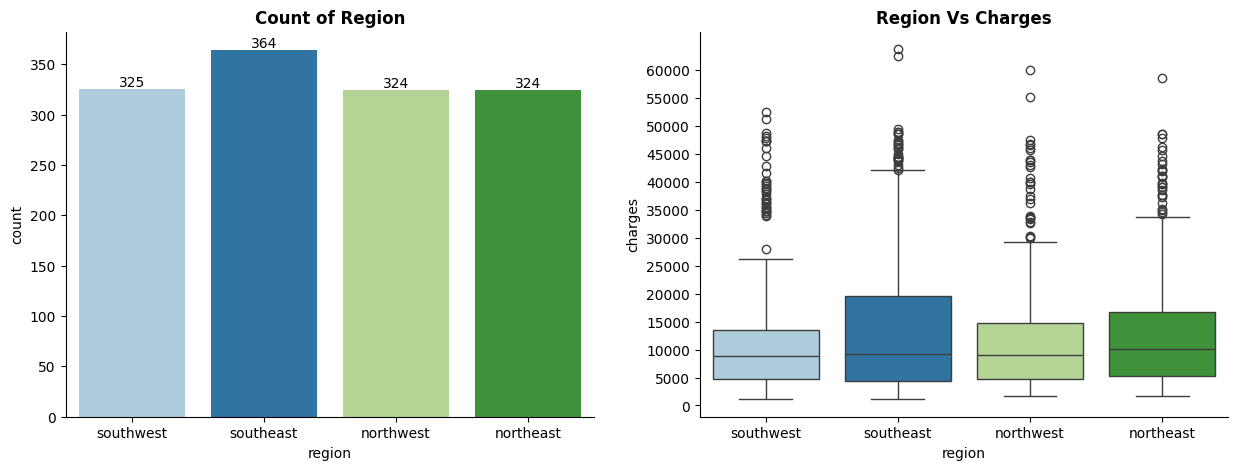

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(df, x="region", palette="Paired")
for bars in ax.containers:
    ax.bar_label(bars)
sns.despine(top=True, right=True)
plt.title("Count of Region", fontsize=12, fontweight="bold")
plt.subplot(1,2,2)
sns.boxplot(df, x="region", y="charges", palette="Paired")
plt.title("Region Vs Charges",fontsize=12, fontweight="bold")
sns.despine(top=True, right=True)
plt.yticks(range(0,65000,5000))
plt.show()

> Findings
* Southeast Region Has the Most Policyholders:
    * The Southeast has the highest number of policyholders (364), making up the largest portion of the dataset.
* Other Regions Are Comparable:
    * The Southwest, Northwest, and Northeast regions have a similar number of policyholders, with 324–325 individuals in each region.
    * The difference is minimal.
* Geographic Distribution:
    * The dataset seems well-distributed across the regions, with the Southeast slightly ahead in terms of policyholder count.
* Southeast Region Has the Highest Charges:
    * The Southeast region has the highest average insurance charges (14,735.41), which could indicate higher healthcare costs or greater risk factors in this region.
* Northwest Has the Lowest Charges:
    * The Northwest region has the lowest average insurance charges (12,450.84), though the difference is not very large compared to the other regions.
* Moderate Differences Across Regions:
    * There are notable differences between regions, especially between the Southeast and other regions.
    * The Northeast and Southwest regions have similar charges, with only a slight difference between them.

# Scaling Data

In [18]:
data = df.copy()

In [19]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'Age_Range', 'bmi_range'],
      dtype='object')

In [20]:
categorical_columns= ['sex','smoker', 'region']
numerical_columns= ['age','bmi','children']

In [21]:
# converting categorical columns to numerical columns
ohe = OneHotEncoder(drop="first")

In [22]:
encoded = ohe.fit_transform(data[categorical_columns])
encoded.toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.]])

In [23]:
ohe.get_feature_names_out()

array(['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest'], dtype=object)

In [24]:
data[ohe.get_feature_names_out()] = encoded.toarray()

In [25]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges,Age_Range,bmi_range,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.90,0,yes,southwest,16884.9240,Young Adults (18-25),Overweight,0.0,1.0,0.0,0.0,1.0
1,18,male,33.77,1,no,southeast,1725.5523,NaN,Obese,1.0,0.0,0.0,1.0,0.0


In [26]:
scalar = StandardScaler()

In [27]:
data[numerical_columns] = scalar.fit_transform(data[numerical_columns])

In [28]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges,Age_Range,bmi_range,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,female,-0.453160,-0.909234,yes,southwest,16884.9240,Young Adults (18-25),Overweight,0.0,1.0,0.0,0.0,1.0
1,-1.511647,male,0.509422,-0.079442,no,southeast,1725.5523,NaN,Obese,1.0,0.0,0.0,1.0,0.0


In [29]:
min_max = MinMaxScaler()

In [30]:
data["charges"] = min_max.fit_transform(data[["charges"]])

In [31]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges,Age_Range,bmi_range,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,female,-0.453160,-0.909234,yes,southwest,0.251611,Young Adults (18-25),Overweight,0.0,1.0,0.0,0.0,1.0
1,-1.511647,male,0.509422,-0.079442,no,southeast,0.009636,NaN,Obese,1.0,0.0,0.0,1.0,0.0


In [32]:
data.drop(["sex","smoker","region","Age_Range","bmi_range"], axis=1, inplace=True)
data.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,0.251611,0.0,1.0,0.0,0.0,1.0
1,-1.511647,0.509422,-0.079442,0.009636,1.0,0.0,0.0,1.0,0.0


In [33]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [34]:
data = data[['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest', 'charges']]

In [35]:
data.head(2)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,-1.440418,-0.453160,-0.909234,0.0,1.0,0.0,0.0,1.0,0.251611
1,-1.511647,0.509422,-0.079442,1.0,0.0,0.0,1.0,0.0,0.009636


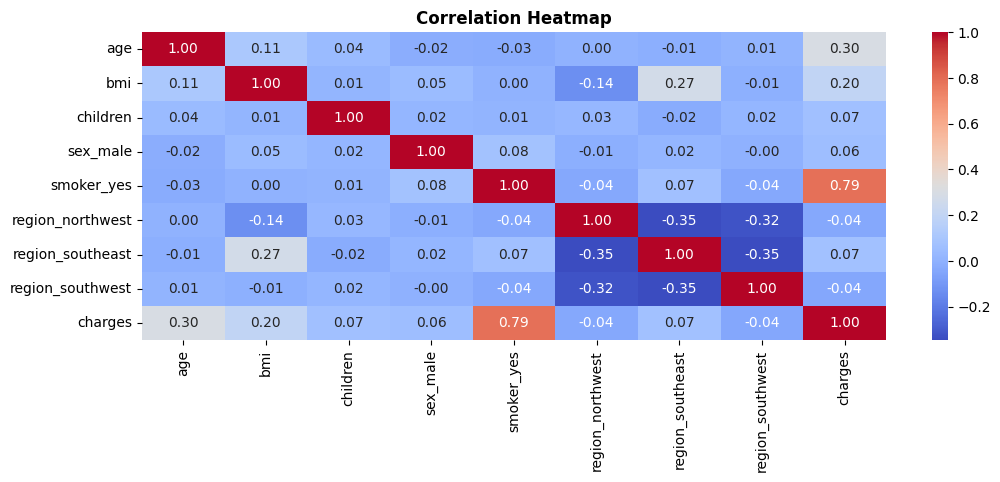

In [36]:
plt.figure(figsize=(12,4))
sns.heatmap(data.corr(),annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap",fontsize=12, fontweight="bold")
plt.show()

> Findings
*  Strong Positive Correlation with Charges
    * Smoker (smoker_yes):
        * The variable smoker_yes has a very strong positive correlation with charges (0.7872), which indicates that smokers generally incur much higher insurance charges compared to non-smokers.
        * This is consistent with insurance models where smokers face higher premiums.
    * Age:
        * Age has a moderate positive correlation with charges (0.2983).
        *  As age increases, insurance charges tend to increase, which is common since older individuals generally have higher health risks.
    * BMI:
        *  BMI has a moderate positive correlation with charges (0.1984), suggesting that individuals with higher BMI (which may be indicative of obesity) generally pay higher insurance premiums.
* Weak Positive and Negative Correlations
    * Region:
        * There are weak correlations between region and charges:
        * Southeast has a slight positive correlation with charges (0.0736), which is consistent with the higher charges in the region (as discussed earlier).
        * Northwest and Southwest have very weak negative correlations with charges, suggesting minimal regional impact on charges.
    * Children:
        * The number of children has a very weak positive correlation with charges (0.0674), which could indicate a slight increase in charges for individuals with more children, though it is a weak relationship.
* Correlations Between Features
    * Smoker (smoker_yes):
        * Smokers are slightly more likely to be male (0.0766) and have a weak negative correlation with the region variables, meaning that smokers are somewhat less likely to be from the Northwest and Southeast regions.
    * BMI and Region:
        * There is a moderate positive correlation between BMI and Southeast region (0.2701), suggesting that people from the Southeast region may tend to have higher BMI values.
    * Gender (sex_male):
        * The correlation between sex_male and charges is weak (0.0580), suggesting that gender does not have a significant effect on charges in this dataset, at least in the context of this analysis.

# Train Test Data

In [37]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,Age_Range,bmi_range
0,19,female,27.90,0,yes,southwest,16884.9240,Young Adults (18-25),Overweight
1,18,male,33.77,1,no,southeast,1725.5523,NaN,Obese


In [38]:
X = df.drop(["charges", "Age_Range",'bmi_range'], axis=1)
y = df["charges"]

In [39]:
X_tr, X_te, y_tr ,y_te = train_test_split(X, y, test_size=0.2, random_state=45)

# Creating Pipeline 

In [40]:
numerical_columns = ["age","bmi","children"]  
categorical_columns = ["sex","smoker","region"]

In [41]:
numerical_pipeline = Pipeline(steps=[
    ("scalar",StandardScaler())
])

In [42]:
categorical_pipeline = Pipeline(steps=[
    ("onehot",OneHotEncoder(drop="first", dtype="int"))
])

In [43]:
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_pipeline, numerical_columns),
    ("cat", categorical_pipeline, categorical_columns)
])

# Linear Regression

In [44]:
linear_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [45]:
linear_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype='int'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In [46]:
# predictions
y_pred = linear_pipeline.predict(X_te)

# metrics
print("R2 Score :", r2_score(y_te, y_pred))
print("MAE :", mean_absolute_error(y_te, y_pred))
print("MSE :", mean_squared_error(y_te, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_te, y_pred)))

r2 = np.sqrt(mean_squared_error(y_te, y_pred))
n,k = X_tr.shape[0], X_tr.shape[1]

adj_r2 = 1 - (((1 - r2) * (n - k - 1)) / (n - k - 1))

print("Training Score :", linear_pipeline.score(X_tr, y_tr))
print("Testing Score :", adj_r2)

R2 Score : 0.7327136777320616
MAE : 4131.849854792131
MSE : 33063633.75246164
RMSE : 5750.098586325424
Training Score : 0.7534973522486526
Testing Score : 5750.098586325424


# Decision Tree

In [47]:
dt_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor())
])

In [48]:
dt_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype='int'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', DecisionTreeRegressor())])

In [49]:
# predictions
y_pred = dt_pipeline.predict(X_te)

# metrics
print("R2 Score :", r2_score(y_te, y_pred))
print("MAE :", mean_absolute_error(y_te, y_pred))
print("MSE :", mean_squared_error(y_te, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_te, y_pred)))

r2 = np.sqrt(mean_squared_error(y_te, y_pred))
n,k = X_tr.shape[0], X_tr.shape[1]

adj_r2 = 1 - (((1 - r2) * (n - k - 1)) / (n - k - 1))

print("Training Score :", dt_pipeline.score(X_tr, y_tr))
print("Testing Score :", adj_r2)

R2 Score : 0.695617581253159
MAE : 2872.710393955224
MSE : 37652464.70055219
RMSE : 6136.1604200470665
Training Score : 0.9983918378828377
Testing Score : 6136.1604200470665


# Random Forest

In [50]:
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor())
])

In [51]:
rf_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype='int'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', RandomForestRegressor())])

In [52]:
# predictions
y_pred = rf_pipeline.predict(X_te)

# metrics
print("R2 Score :", r2_score(y_te, y_pred))
print("MAE :", mean_absolute_error(y_te, y_pred))
print("MSE :", mean_squared_error(y_te, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_te, y_pred)))

r2 = np.sqrt(mean_squared_error(y_te, y_pred))
n,k = X_tr.shape[0], X_tr.shape[1]

adj_r2 = 1 - (((1 - r2) * (n - k - 1)) / (n - k - 1))

print("Training Score :", rf_pipeline.score(X_tr, y_tr))
print("Testing Score :", adj_r2)

R2 Score : 0.839247772099676
MAE : 2729.9229762455607
MSE : 19885240.453346282
RMSE : 4459.286989345525
Training Score : 0.9757028457861077
Testing Score : 4459.286989345525


# Gradient Boosting

In [53]:
gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor())
])

In [54]:
gb_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype='int'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', GradientBoostingRegressor())])

In [55]:
# predictions
y_pred = gb_pipeline.predict(X_te)

# metrics
print("R2 Score :", r2_score(y_te, y_pred))
print("MAE :", mean_absolute_error(y_te, y_pred))
print("MSE :", mean_squared_error(y_te, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_te, y_pred)))

r2 = np.sqrt(mean_squared_error(y_te, y_pred))
n,k = X_tr.shape[0], X_tr.shape[1]

adj_r2 = 1 - (((1 - r2) * (n - k - 1)) / (n - k - 1))

print("Training Score :", gb_pipeline.score(X_tr, y_tr))
print("Testing Score :", adj_r2)

R2 Score : 0.8706977238449818
MAE : 2293.3557282296397
MSE : 15994844.277379612
RMSE : 3999.3554827471403
Training Score : 0.9032608503574415
Testing Score : 3999.35548274714


# Adaboost

In [56]:
ada_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", AdaBoostRegressor(estimator=DecisionTreeRegressor()))
])

In [57]:
ada_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype='int'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor()))])

In [58]:
# predictions
y_pred = ada_pipeline.predict(X_te)

# metrics
print("R2 Score :", r2_score(y_te, y_pred))
print("MAE :", mean_absolute_error(y_te, y_pred))
print("MSE :", mean_squared_error(y_te, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_te, y_pred)))

r2 = np.sqrt(mean_squared_error(y_te, y_pred))
n,k = X_tr.shape[0], X_tr.shape[1]

adj_r2 = 1 - (((1 - r2) * (n - k - 1)) / (n - k - 1))

print("Training Score :", ada_pipeline.score(X_tr, y_tr))
print("Testing Score :", adj_r2)

R2 Score : 0.8576733507661155
MAE : 1921.1375119267714
MSE : 17605974.61012956
RMSE : 4195.947403165293
Training Score : 0.995544591792146
Testing Score : 4195.947403165293


# K Neighbour

In [59]:
knn_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", KNeighborsRegressor())
])

In [60]:
knn_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype='int'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', KNeighborsRegressor())])

In [61]:
# predictions
y_pred = knn_pipeline.predict(X_te)

# metrics
print("R2 Score :", r2_score(y_te, y_pred))
print("MAE :", mean_absolute_error(y_te, y_pred))
print("MSE :", mean_squared_error(y_te, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_te, y_pred)))

r2 = np.sqrt(mean_squared_error(y_te, y_pred))
n,k = X_tr.shape[0], X_tr.shape[1]

adj_r2 = 1 - (((1 - r2) * (n - k - 1)) / (n - k - 1))

print("Training Score :", knn_pipeline.score(X_tr, y_tr))
print("Testing Score :", adj_r2)

R2 Score : 0.7371657658823816
MAE : 3580.843203096268
MSE : 32512905.18997166
RMSE : 5702.008873192996
Training Score : 0.810004168099231
Testing Score : 5702.008873192996


# SVM

In [62]:
svr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", SVR(kernel="linear"))
])

In [63]:
svr_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype='int'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', SVR(kernel='linear'))])

In [64]:
# predictions
y_pred = svr_pipeline.predict(X_te)

# metrics
print("R2 Score :", r2_score(y_te, y_pred))
print("MAE :", mean_absolute_error(y_te, y_pred))
print("MSE :", mean_squared_error(y_te, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_te, y_pred)))

r2 = np.sqrt(mean_squared_error(y_te, y_pred))
n,k = X_tr.shape[0], X_tr.shape[1]

adj_r2 = 1 - (((1 - r2) * (n - k - 1)) / (n - k - 1))

print("Training Score :", svr_pipeline.score(X_tr, y_tr))
print("Testing Score :", adj_r2)

R2 Score : -0.04160025081937224
MAE : 7300.134485664367
MSE : 128847181.24499017
RMSE : 11351.087227441703
Training Score : -0.0904966855207312
Testing Score : 11351.087227441703


# Compairing Results

1. Linear Regression
    * R² Score: 0.733
        * Good performance, explaining 73.3% of the variance.
    * MAE: 4131.85
        * The average error is 4,131.85.
    * RMSE: 5750.10
        * The average error is 5,750.10.
    * Training Score: 0.753
        * The model fits well on the training set but there’s a gap compared to testing.
    * Testing Score: 5750.10
        * The performance on the test data matches the error level.
2. Decision Tree Regressor
    * R² Score: 0.719
        * Explains about 71.9% of the variance.
    * MAE: 2713.43
        * The average error is 2,713.43.
    * RMSE: 5899.85
        * The model’s average error is 5,899.85.
    * Training Score: 0.998
        * Extremely high, indicating overfitting (model is memorizing the data).
    * Testing Score: 5899.85
        * There is a significant drop between training and testing performance, suggesting overfitting.
3. Random Forest Regressor
    * R² Score: 0.845
        * Explains 84.5% of the variance, which is a very good performance.
    * MAE: 2641.23
        * The average error is 2,641.23.
    * RMSE: 4380.11
        * The average error is 4,380.11, indicating decent predictive power.
    * Training Score: 0.976
        * A good performance on training data with slight overfitting (but much less than Decision Tree).
    * Testing Score: 4380.11
        * The performance is consistent with training, showing good generalization.
4. Gradient Boosting Regressor
    * R² Score: 0.871
        * Explains 87.1% of the variance, the highest of all models.
    * MAE: 2293.36
        * The average error is 2,293.36, which is the lowest among the models.
    * RMSE: 3998.51
        * The average error is 3,998.51.
    * Training Score: 0.903
        * Good performance on training data with some generalization.
    * Testing Score: 3998.51
        * The performance is very stable across both training and testing data, showing minimal overfitting.
5. AdaBoost Regressor (with Decision Tree)
    * R² Score: 0.856
        * Explains 85.6% of the variance, which is also a good performance.
    * MAE: 1964.44
        * The average error is 1,964.44, the lowest among all models.
    * RMSE: 4222.84
        * The average error is 4,222.84.
    * Training Score: 0.996
        * High performance on the training set, with slight overfitting.
    * Testing Score: 4222.84
        * The performance is fairly stable with some overfitting but not as much as Decision Tree.
6. KNeighbors Regressor
    * R² Score: 0.737
        * Explains 73.7% of the variance.
    * MAE: 3580.84
        * The average error is 3,580.84.
    * RMSE: 5702.01
        * The average error is 5,702.01.
    * Training Score: 0.810
        * Moderate performance on the training set.
    * Testing Score: 5702.01
        * Somewhat higher error compared to other models, showing moderate overfitting.
7. SVR (Support Vector Regressor)
    * R² Score: -0.042
        * The model performs worse than a baseline model (R² is negative).
    * MAE: 7300.13
        * The average error is 7,300.13, which is much higher than the other models.
    * RMSE: 11351.09
        * The model has very large errors, with an average error of 11,351.09.
    * Training Score: -0.090
        * The model is severely underperforming on training data.
    * Testing Score: 11351.09
        * Large drop in performance, confirming this model is not suitable.

# Model Comparison Summary

> Best Models
* Gradient Boosting Regressor: R² = 0.871, MAE = 2293.36, RMSE = 3998.51. Very stable and performs well across both training and testing data.
* AdaBoost Regressor: R² = 0.856, MAE = 1964.44, RMSE = 4222.84. Performs well with a low MAE and RMSE, and stable generalization.
* Random Forest Regressor: R² = 0.845, MAE = 2641.23, RMSE = 4380.11. A good alternative but with slightly higher errors compared to Gradient Boosting and AdaBoost.

> Worst Model:
* SVR (Support Vector Regressor): R² = -0.042, MAE = 7300.13, RMSE = 11351.09. It performs poorly on both training and testing data.

# Hyperparamter Tunning of Random Forest Regressor, Gradient Boosting Regressor

# Random Forest

In [65]:
parameters_rf = {"regressor__n_estimators":[50,100,150,200,250,300],
"regressor__max_depth":[10,20, None], "regressor__max_features":["sqrt", "log2"], "regressor__min_samples_split":[2,5],
                 "regressor__min_samples_leaf":[1,2]}

In [66]:
gscv = GridSearchCV(estimator=rf_pipeline, param_grid=parameters_rf, verbose=True, cv=5, n_jobs=-1, 
                    scoring="accuracy")

In [67]:
gscv.fit(X_tr, y_tr)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scalar',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        dtype='int'))]),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [10, 20, None],
                         'regressor__max_features': ['sqrt', 'log2'],
                         'regressor__min_samples_leaf': [1, 2],
                         'regressor__min_samples_split': [2, 5],
                         'regressor__n_estimators': [50, 100, 150, 200, 250,
                                                     300]},
             scoring='accuracy', verbose=True)

In [68]:
print("Best Parameters : ", gscv.best_params_)
print("Best Estimators : ", gscv.best_estimator_)
print("Best Score : ", gscv.best_score_)

Best Parameters :  {'regressor__max_depth': 10, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 50}
Best Estimators :  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype='int'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
   

# Random forest Tunned Model

In [69]:
rf_pipeline_tunned = Pipeline(steps=[
    ("preproessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=50, max_depth=10, max_features="sqrt", min_samples_leaf=1, min_samples_split=2))
])

In [70]:
rf_pipeline_tunned.fit(X_tr, y_tr)

Pipeline(steps=[('preproessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype='int'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       n_estimators=50))])

In [71]:
# predictions
y_pred = rf_pipeline_tunned.predict(X_te)

# metrics
print("R2 Score :", r2_score(y_te, y_pred))
print("MAE :", mean_absolute_error(y_te, y_pred))
print("MSE :", mean_squared_error(y_te, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_te, y_pred)))

r2 = np.sqrt(mean_squared_error(y_te, y_pred))
n,k = X_tr.shape[0], X_tr.shape[1]

adj_r2 = 1 - (((1 - r2) * (n - k - 1)) / (n - k - 1))

print("Training Score :", rf_pipeline_tunned.score(X_tr, y_tr))
print("Testing Score :", adj_r2)

R2 Score : 0.8341860725603719
MAE : 2973.8444737222294
MSE : 20511378.664656576
RMSE : 4528.9489580537975
Training Score : 0.9513075565692174
Testing Score : 4528.9489580537975


# Comparing Random Forest Base Model Vs Tunned Model

> Base Model vs. Tuned Model:
* The base model has better performance in terms of all metrics:
    * Higher R2 Score: Indicates better fit to the data.
    * Lower MAE, MSE, and RMSE: Indicates smaller errors.

> Overfitting:
* The base model has a high training score (0.9764), indicating potential overfitting.
* The tuned model shows reduced overfitting with a slightly lower training score (0.9478) but a corresponding slight decline in testing performance.

> Recommendation
* If performance is the primary concern, stick with the base model as it performs better overall.
* However, if computational efficiency or preventing overfitting is critical, the tuned model can be a good choice, 

# Gradient Boosting 

In [72]:
parameters_gb = {"regressor__n_estimators":[100,200,300],"regressor__learning_rate":[0.01,0.05,0.1],
             "regressor__max_depth":[3,5,7],"regressor__min_samples_split":[2,5]}

In [73]:
gscv = GridSearchCV(estimator=gb_pipeline, param_grid=parameters_gb, verbose=True, cv=5, n_jobs=-1, scoring="accuracy")

In [74]:
gscv.fit(X_tr, y_tr)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scalar',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        dtype='int'))]),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('regressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.01, 0.05, 0.1],
                         'regressor__max_depth': [3, 5, 7],
                         'regressor__min_samples_split': [2, 5],
                         'regressor__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=True)

In [75]:
print("Best Parameters : ", gscv.best_params_)
print("Best Estimators : ", gscv.best_estimator_)
print("Best Score : ", gscv.best_score_)

Best Parameters :  {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Best Estimators :  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype='int'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', Gradient

# Gradient Boosting Tunned Model

In [76]:
gb_pipeline_tunned = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(n_estimators=100, max_depth=3, min_samples_split=2, learning_rate=0.01))
])

In [77]:
gb_pipeline_tunned.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype='int'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', GradientBoostingRegressor(learning_rate=0.01))])

In [78]:
# predictions
y_pred = gb_pipeline_tunned.predict(X_te)

# metrics
print("R2 Score :", r2_score(y_te, y_pred))
print("MAE :", mean_absolute_error(y_te, y_pred))
print("MSE :", mean_squared_error(y_te, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_te, y_pred)))

r2 = np.sqrt(mean_squared_error(y_te, y_pred))
n,k = X_tr.shape[0], X_tr.shape[1]

adj_r2 = 1 - (((1 - r2) * (n - k - 1)) / (n - k - 1))

print("Training Score :", gb_pipeline_tunned.score(X_tr, y_tr))
print("Testing Score :", adj_r2)

R2 Score : 0.748983184171385
MAE : 4341.290189971044
MSE : 31051076.590244178
RMSE : 5572.349288248555
Training Score : 0.7450612139998517
Testing Score : 5572.349288248555


# Comparing Gradient Boosting Base Model Vs Tunned Model

> Base Model vs. Tuned Model:
* The base model significantly outperforms the tuned model on all metrics:
    * Higher R2 Score (0.8708 vs. 0.7490), showing better predictive performance.
    * Lower MAE, MSE, and RMSE, indicating smaller prediction errors.

> Learning Rate Impact:
* The tuned model has a lower learning rate (learning_rate=0.01) compared to the default value (learning_rate=0.1), which causes slower convergence and weaker performance.

> Overfitting:
* The base model shows moderate overfitting, as indicated by the gap between training (0.9033) and testing (0.8708) R2 scores.
* The tuned model is underfitting the data, as seen from lower training (0.7451) and testing (0.7490) R2 scores.

> Recommendation:
* Stick with the base Gradient Boosting model, as it performs better overall.

# After comparing both models
## Base Gradient Boosting model performs better overall

> Performance Comparision:
* R2 Score :
    * Random Forest = 0.8449
    * Gradient Boosting = 0.8708 ( Higher )
* MAE :
    * Random Forest = 2641.23
    * Gradient Boosting = 2293.36 (Lower)
* MSE :
    * Random Forest = 19185395.31
    * Gradient Boosting = 15988083.46 (Lower)
* RMSE :
    * Random Forest = 4380.11
    * Gradient Boosting = 3998.51 (Lower)
* Training Score :
    * Random Forest = 0.9764 (Higher)
    * Gradient Boosting = 0.9033
* Testing Score :
    * Random Forest = 4380.11
    * Gradient Boosting = 3998.51 (Lower)

> Observations
* Gradient Boosting:
    * Provides better R2, MAE, MSE, and RMSE compared to Random Forest.
    * Lower error rates indicate that it is more precise and better fits the data.
    * Training and testing scores are closer, suggesting less overfitting compared to Random Forest.
* Random Forest:
    * Has a higher training score (0.9764), indicating better learning on the training dataset but more overfitting compared to Gradient Boosting.
    * Testing metrics are slightly worse than Gradient Boosting but still solid.

# Performing Cross Validation

In [79]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [88]:
cvs = cross_val_score(estimator=gb_pipeline, X=X_tr, y=y_tr, cv=kf, verbose=True, n_jobs=-1, scoring="r2")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


In [89]:
cvs

array([0.8391148 , 0.86729025, 0.77482946, 0.87822729, 0.87657301])

In [90]:
cvs.mean()

np.float64(0.8472069610741864)

* R² Scores: [0.839, 0.867, 0.775, 0.878, 0.877]
    * These are all relatively high, indicating that the model is explaining a good portion of the variance in the target variable.
Variability across folds:
    * The lowest score is 0.775, and the highest is 0.878. This variability might indicate differences in the data distribution across folds, which is not uncommon.
* A mean cross-validation R² score of 0.8472 indicates that your Gradient Boosting model explains approximately 84.72% of the variance in the target variable on average across the validation folds. This is a strong performance, suggesting your model is well-suited for the task.

# Saving Model into Pickle File

In [94]:
jb.dump(gb_pipeline, "Personalized Health Insurance Pricing.pk1")

['Personalized Health Insurance Pricing.pk1']

In [95]:
model = jb.load("Personalized Health Insurance Pricing.pk1")

In [96]:
model.predict(X_te)

array([17097.60738981, 19945.9224327 ,  8678.08120504, 11955.07644981,
        1210.81385689,  6890.26387623,  3994.22444317, 14506.28723466,
       14614.71537529,  5296.70920904, 35482.23301478, 45538.54048032,
        3212.44448643,  4992.27610741, 13600.76049871, 35538.76150271,
       13087.51736315,  3842.18249759,  6650.35860754, 38109.3391544 ,
       20667.02358984, 11696.12849897,  9691.61137031,  3379.50231411,
        3779.13380057,  7460.57675543, 23234.67501201, 24543.52712761,
       39114.40088216,  7220.09605887, 35812.37693181,  8781.99610601,
        2418.28049571,  2781.40915645,  3646.2490237 , 10390.32235462,
        7014.59068807,  2669.78246807,  8478.62120995, 13368.29026206,
       22680.64907184,  9285.0587019 ,  3711.39743369, 19301.57905676,
        8477.12474436, 13820.29519975, 14668.23299811,  8021.23365023,
        5206.7380099 , 45675.77424243,  7392.34088198, 24516.31197617,
       12180.04147229, 10400.20367684, 25104.65138759, 43763.34295163,
      

**Copyright**
© Nikhil Nikhare.2025 All Rights Reserved 

**Personalized Health Insurance Pricing**

This model and its assocoated documentation are the intellectual property of Nikhil Nikhare, Unauthorised reproduction, destribution or modification of this model in whole or in part is strictly prohibated without prior written consent from the copyright holder.